# Applied Data Science Capstone Project 

Download all necessery libraries required

In [7]:
import pandas as pd
import lxml
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import numpy as np
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
%matplotlib inline 
import matplotlib.pyplot as plt

## Data Prepration & Manipulation

Scrap Top-30 US airports list from Wikipedia

In [8]:
#Get Top Airports
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States')
top_airports = dfs[0]

Scrao GDP Data from Wikipedia

In [9]:
#Get Top GDP cities
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._metropolitan_areas_by_GDP')
top_gdp = dfs[0]

In [10]:
top_airports

,Rank(2018),Airports (large hubs),IATACode,Major city served,State,2019,2018[3],2017[4],2016[5],2015[6],2014[7],2013[8],2012[9],2011[10],2010[11],2009[12]
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,NaN,51866464,50251964,50501858,49340732,46604273,45308407,45798809,44414121,43130585,42280868
1,2,Los Angeles International Airport,LAX,Los Angeles,CA,NaN,42626783,41232432,39636042,36351226,34314197,32425892,31326268,30528737,28857755,27439897
2,3,O'Hare International Airport,ORD,Chicago,IL,NaN,39874879,38593028,37589899,36305668,33686811,32317835,32171743,31892301,32171831,31135732
3,4,Dallas/Fort Worth International Airport,DFW,Dallas,TX,NaN,32800721,31816933,31283579,31589832,30766940,29038128,28022877,27518358,27100656,26663984
4,5,Denver International Airport,DEN,Denver,CO,NaN,31363573,29809097,28267394,26280043,26000591,25496885,25799832,25667499,25241962,24013669
5,6,John F. Kennedy International Airport,JFK,New York,NY,NaN,30541459,29533154,29239151,27782369,26244928,25036358,24520943,23664830,22934047,22710272
6,7,San Francisco International Airport,SFO,San Francisco,CA,NaN,27794154,26900048,25707101,24190549,22756008,21704626,21284224,20038679,19359003,18467908
7,8,Seattle–Tacoma International Airport,SEA,Seattle,WA,NaN,24894338,22639124,21887110,21231781,18781489,17450425,16625787,16425732,15406243,15273092
8,9,McCarran International Airport,LAS,Las Vegas,NV,NaN,23655285,23364393,22833267,21824231,20551016,19946179,19941173,19854759,18996738,19445952
9,10,Orlando International Airport,MCO,Orlando,FL,NaN,23184634,21565448,20283541,18759938,17278608,16884524,17159425,17250415,17017491,16371016


In [11]:
top_gdp

,2017 Rank,Metropolitan area,2018,2017,2016,2015,2014,2013,2012
0,1,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",1772319,1698122,1634671,1577366,1511763,1439043,1401233
1,2,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",1047661,995114,945600,912384,858170,820353,788081
2,3,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",689464,659855,641589,627033,599805,577948,561016
3,4,"San Francisco-Oakland-Berkeley, CA (Metropolit...",548613,509382,469472,446344,413519,383254,364594
4,5,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",540684,515553,500084,481861,460254,448268,442224
5,6,"Dallas-Fort Worth-Arlington, TX (Metropolitan ...",512509,482218,458973,442879,420929,394178,375065
6,7,"Houston-The Woodlands-Sugar Land, TX (Metropol...",478778,447521,430444,446486,430726,423766,404431
7,8,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",463570,439144,421783,406675,381353,365670,357087
8,9,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (M...",444148,422539,416110,406605,388621,374787,364052
9,10,"Atlanta-Sandy Springs-Roswell, GA (Metropolita...",397261,385542,369806,347604,326502,307750,291481


Declare a Data Frame with columns that will be required in the analysis

In [12]:
gdp_airport = pd.DataFrame(columns=['Airport', 'City', 'Area','AirTraffic', 'GDP'])

In [13]:
gdp_airport.head()

,Airport,City,Area,AirTraffic,GDP


Copying relevant columns from top_airports to newly declared data frame

In [14]:
gdp_airport['Airport'] = top_airports['Airports (large hubs)']
gdp_airport['City'] = top_airports['Major city served']
gdp_airport['AirTraffic'] = top_airports['2018[3]']

In [15]:
gdp_airport.head()


,Airport,City,Area,AirTraffic,GDP
0,Hartsfield–Jackson Atlanta International Airport,Atlanta,NaN,51866464,NaN
1,Los Angeles International Airport,Los Angeles,NaN,42626783,NaN
2,O'Hare International Airport,Chicago,NaN,39874879,NaN
3,Dallas/Fort Worth International Airport,Dallas,NaN,32800721,NaN
4,Denver International Airport,Denver,NaN,31363573,NaN


The GDP information is not given by city. Rather it is given by Metropolitian area. Following function searches for a city in the "Metropolitian Area" column on top_gdp and return the GDP value in 2018 for the Metro area concerened city belongs to then appends it to the data frame we declared for our analysis.

In [16]:
#Looking up GDP data and storing it in gdp_airport df
for i in range(len(gdp_airport)):
    lookedup_row = 0
    lookup_city = gdp_airport.iloc[i,1]
    lookup_city = lookup_city.split(',')[0]
    lookedup_row = top_gdp[top_gdp['Metropolitan area'].str.contains(lookup_city,case=False)]
    
    if lookedup_row.empty == False:
        gdp_airport.iloc[i,2] = lookedup_row.iloc[0,1]
        gdp_airport.iloc[i,4] = lookedup_row.iloc[0,2]

gdp_airport
    
    

,Airport,City,Area,AirTraffic,GDP
0,Hartsfield–Jackson Atlanta International Airport,Atlanta,"Atlanta-Sandy Springs-Roswell, GA (Metropolita...",51866464,397261
1,Los Angeles International Airport,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",42626783,1047661
2,O'Hare International Airport,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",39874879,689464
3,Dallas/Fort Worth International Airport,Dallas,"Dallas-Fort Worth-Arlington, TX (Metropolitan ...",32800721,512509
4,Denver International Airport,Denver,"Denver-Aurora-Lakewood, CO (Metropolitan Stati...",31363573,214157
5,John F. Kennedy International Airport,New York,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",30541459,1772319
6,San Francisco International Airport,San Francisco,"San Francisco-Oakland-Berkeley, CA (Metropolit...",27794154,548613
7,Seattle–Tacoma International Airport,Seattle,"Seattle-Tacoma-Bellevue, WA (Metropolitan Stat...",24894338,392036
8,McCarran International Airport,Las Vegas,"Las Vegas-Henderson-Paradise, NV (Metropolitan...",23655285,122423
9,Orlando International Airport,Orlando,"Orlando-Kissimmee-Sanford, FL (Metropolitan St...",23184634,138947


Now, the geographical coordiates of the airports present in out data set would be fetched through geopy library. Airport names would be used as the input to get the desired information.

In [17]:
#Find Geographical Location of Airports
coords = pd.DataFrame(columns=['Latitude', 'Longitude'])

for i in range(len(gdp_airport)):
    address = gdp_airport['Airport'][i]
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        coords = coords.append({'Latitude':latitude, 'Longitude':longitude}, ignore_index = True)
        #print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))
    else:
        coords = coords.append({'Latitude':None, 'Longitude':None}, ignore_index = True)

coords

,Latitude,Longitude
0,33.637799,-84.429271
1,33.942168,-118.421376
2,41.977985,-87.909321
3,32.896519,-97.046522
4,39.850188,-104.675328
5,40.642948,-73.779373
6,37.622452,-122.384072
7,47.447567,-122.308016
8,36.086103,-115.161120
9,28.412904,-81.309443


Geopy library was able to find the cooridnates of all the airports except for George Bush Intercontinental Airport & General Edward Lawrence Logan International. There coordinates data is appended manually by looking up the coordinates on Google Maps. 

In [18]:
#Manually adding cordinates of 2 airports which Geolocator cannot find
# George Bush Intercontinental Airport  = (29.9902245,-95.3389714))
# General Edward Lawrence Logan International = (42.3656171,-71.0117489)
coords.iloc[13,0] = 29.9902245
coords.iloc[13,1] = -95.3389714

coords.iloc[15,0] = 42.3656171
coords.iloc[15,1] = -71.0117489

Attaching Co-ordinates data to gdp_airport data frame which will used for analysis

In [19]:
#Attach the coordinate values to gdp_Airport dataframe
gdp_airport = gdp_airport.join(coords)
gdp_airport

,Airport,City,Area,AirTraffic,GDP,Latitude,Longitude
0,Hartsfield–Jackson Atlanta International Airport,Atlanta,"Atlanta-Sandy Springs-Roswell, GA (Metropolita...",51866464,397261,33.637799,-84.429271
1,Los Angeles International Airport,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",42626783,1047661,33.942168,-118.421376
2,O'Hare International Airport,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",39874879,689464,41.977985,-87.909321
3,Dallas/Fort Worth International Airport,Dallas,"Dallas-Fort Worth-Arlington, TX (Metropolitan ...",32800721,512509,32.896519,-97.046522
4,Denver International Airport,Denver,"Denver-Aurora-Lakewood, CO (Metropolitan Stati...",31363573,214157,39.850188,-104.675328
5,John F. Kennedy International Airport,New York,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",30541459,1772319,40.642948,-73.779373
6,San Francisco International Airport,San Francisco,"San Francisco-Oakland-Berkeley, CA (Metropolit...",27794154,548613,37.622452,-122.384072
7,Seattle–Tacoma International Airport,Seattle,"Seattle-Tacoma-Bellevue, WA (Metropolitan Stat...",24894338,392036,47.447567,-122.308016
8,McCarran International Airport,Las Vegas,"Las Vegas-Henderson-Paradise, NV (Metropolitan...",23655285,122423,36.086103,-115.161120
9,Orlando International Airport,Orlando,"Orlando-Kissimmee-Sanford, FL (Metropolitan St...",23184634,138947,28.412904,-81.309443


Let's plot the airport we are analyzing on a map

In [20]:
# create map of Airports using latitude and longitude values
#Coordinates of USA: 38.9170215,-102.4603531
map_airports = folium.Map(location=[38.9170215, -102.4603531], zoom_start=4)

# add markers to map
for lat, lng, portname, traffic in zip(gdp_airport['Latitude'], gdp_airport['Longitude'], gdp_airport['Airport'], gdp_airport['AirTraffic']):
    label = '{}'.format(portname)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_airports)  
    
map_airports

Setting up Foursquare credentials.


In [21]:
CLIENT_ID = 'SOACOHUBSDFDNPMEO3V0WHJE3PI43LY4TOTSEDIST3L3UPLD' # your Foursquare ID
CLIENT_SECRET = 'OU3ELTQ1SYEGB31NJRVRM0A1GWG20YMQTB2SRH5EEKFFN1KL' # your Foursquare Secret
VERSION = '20200130' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SOACOHUBSDFDNPMEO3V0WHJE3PI43LY4TOTSEDIST3L3UPLD
CLIENT_SECRET:OU3ELTQ1SYEGB31NJRVRM0A1GWG20YMQTB2SRH5EEKFFN1KL


In [22]:
#FourSquare Reference key for Hotels
hotel_cat='4bf58dd8d48988d1fa931735'

Now we will make API calls to find of number of hotels within 10 miles radius of each airport. <br>
The JSON file has 'totalResults' key nested inside 'reponse' key which can directly give us total number of results retured by the API without doing any post processing with the JSON file. The results will be stored in numHotels data frame.

In [23]:
#df to store the API response
numHotels = pd.DataFrame(columns=['Airport', 'NumHotels'])

#Search for hotels in 10 miles radius for various airports

for i in range(len(gdp_airport)):
    total_results = 0
    LIMIT = 500
    radius = 16100
    latitude = gdp_airport['Latitude'][i]
    longitude = gdp_airport['Longitude'][i]
    airport = gdp_airport['Airport'][i]

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT,
        hotel_cat)
    results = requests.get(url).json()
    total_results = results['response']['totalResults']
    numHotels = numHotels.append({'Airport':airport,'NumHotels':total_results}, ignore_index = True)



numHotels   


,Airport,NumHotels
0,Hartsfield–Jackson Atlanta International Airport,169
1,Los Angeles International Airport,200
2,O'Hare International Airport,146
3,Dallas/Fort Worth International Airport,188
4,Denver International Airport,81
5,John F. Kennedy International Airport,97
6,San Francisco International Airport,128
7,Seattle–Tacoma International Airport,108
8,McCarran International Airport,254
9,Orlando International Airport,140


Attaching IATA codes to the gdp_airport so they could be used as labels in plots instead of full airport name.

In [24]:
#Attach Num Hotels to gdp_Airport dataframe
gdp_airport = gdp_airport.join(numHotels['NumHotels'])


#Add IATA COdes
gdp_airport = gdp_airport.join(top_airports['IATACode'])
gdp_airport

,Airport,City,Area,AirTraffic,GDP,Latitude,Longitude,NumHotels,IATACode
0,Hartsfield–Jackson Atlanta International Airport,Atlanta,"Atlanta-Sandy Springs-Roswell, GA (Metropolita...",51866464,397261,33.637799,-84.429271,169,ATL
1,Los Angeles International Airport,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",42626783,1047661,33.942168,-118.421376,200,LAX
2,O'Hare International Airport,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",39874879,689464,41.977985,-87.909321,146,ORD
3,Dallas/Fort Worth International Airport,Dallas,"Dallas-Fort Worth-Arlington, TX (Metropolitan ...",32800721,512509,32.896519,-97.046522,188,DFW
4,Denver International Airport,Denver,"Denver-Aurora-Lakewood, CO (Metropolitan Stati...",31363573,214157,39.850188,-104.675328,81,DEN
5,John F. Kennedy International Airport,New York,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",30541459,1772319,40.642948,-73.779373,97,JFK
6,San Francisco International Airport,San Francisco,"San Francisco-Oakland-Berkeley, CA (Metropolit...",27794154,548613,37.622452,-122.384072,128,SFO
7,Seattle–Tacoma International Airport,Seattle,"Seattle-Tacoma-Bellevue, WA (Metropolitan Stat...",24894338,392036,47.447567,-122.308016,108,SEA
8,McCarran International Airport,Las Vegas,"Las Vegas-Henderson-Paradise, NV (Metropolitan...",23655285,122423,36.086103,-115.161120,254,LAS
9,Orlando International Airport,Orlando,"Orlando-Kissimmee-Sanford, FL (Metropolitan St...",23184634,138947,28.412904,-81.309443,140,MCO


## Data Visulization & Analysis


The following map shows the airport and number of hotels around it. Bigger the bubble, more are hotels around that airport.

In [25]:
# create map of Airports using latitude and longitude values
#Coordinates of USA: 38.9170215,-102.4603531
map_airports = folium.Map(location=[38.9170215, -102.4603531], zoom_start=3)

# add markers to map
for lat, lng, portname, hotels in zip(gdp_airport['Latitude'], gdp_airport['Longitude'], gdp_airport['Airport'], gdp_airport['NumHotels']):
    label = '{}'.format(portname)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=hotels/10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        weight=0.5,
        parse_html=False).add_to(map_airports)  
    
map_airports

We can see from the figure that the airports near the east coast, west coast have more hotels around them. This is because the are commercial hubs and popular tourist attractions as well. Airports in Florida also have a lot of hotels around them, this is probably because it attracts a lot national and international tourists through out the year.

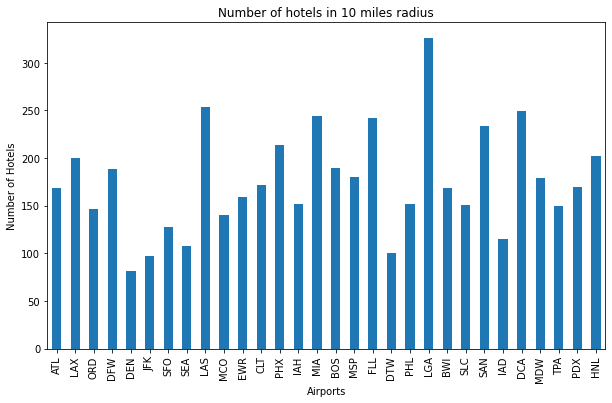

In [26]:
#Bar plot showing number of hotels
ticks_IATACodes = list(gdp_airport['IATACode'])
gdp_airport['NumHotels'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Airports') # add to x-label to the plot
plt.ylabel('Number of Hotels') # add y-label to the plot
plt.title('Number of hotels in 10 miles radius') # add title to the plot
plt.xticks(range(0,len(ticks_IATACodes)),ticks_IATACodes)

plt.show()

This is the bar plot showing number of hotels. It is interesting to see that how JFK and LGA are both in New York, not far from each other but still JFK has 100 something hotels around it but LGA has more than 300!

Now, lets do some Exploratory Data Analysis to see if there is any trend between Socio-Economic factors such as GDP or Annunal Enplanements at certain airport with number of hotels around it. Following scatter plot shows relationship between Number of Hotels near an Airport and Annual Enplanements at that airport. We can see that the relationship seems very random.

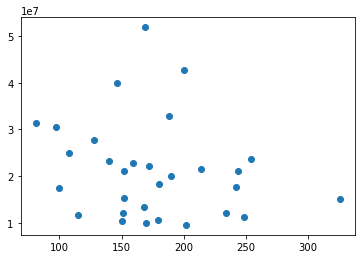

In [27]:
plt.scatter(gdp_airport['NumHotels'], gdp_airport['AirTraffic'])

What about the relationship between number of hotels around an airport and GDP of that city?

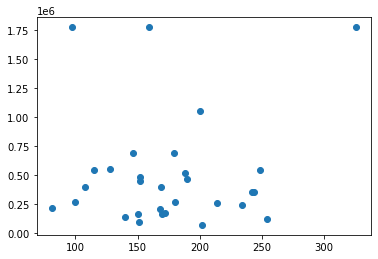

In [29]:
plt.scatter(gdp_airport['NumHotels'], gdp_airport['GDP'])

The relationship seems somewhat linear in a small region but overall it seems either constant or random.

Lets try to fit a Multi Linear Linear Regression Models with GDP and Annual Enplanements as independent variables and Number of Hotels are dependent variable.

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [172]:
X = pd.DataFrame([gdp_airport['GDP'], gdp_airport['AirTraffic']])
X = X.T
y = pd.DataFrame([gdp_airport['NumHotels']])
y = y.T

lm = LinearRegression()
lm.fit(X,y)
lm.score(X,y)

0.0747813627408721

As we can see that the R^2 is quite low. This proves that my initial hunch about the relationship between Number of Hotels and Airport and City size was actially wrong. There seems to be no relationship between the two.

### Thank you for reading.